# Computer Vision Contours

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Contours

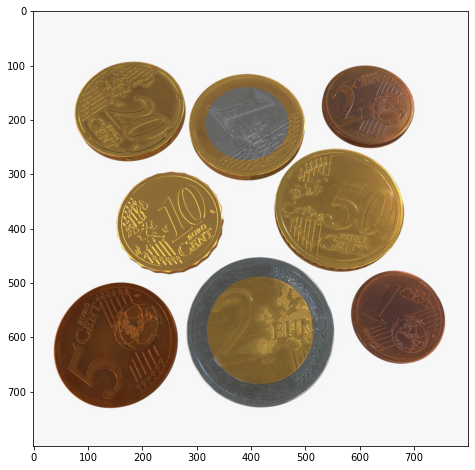

In [2]:
# Have a look at the image below
color_coins = cv2.imread('img/coins5.jpg', cv2.IMREAD_COLOR)
rgb_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12,8))
plt.imshow(rgb_coins);

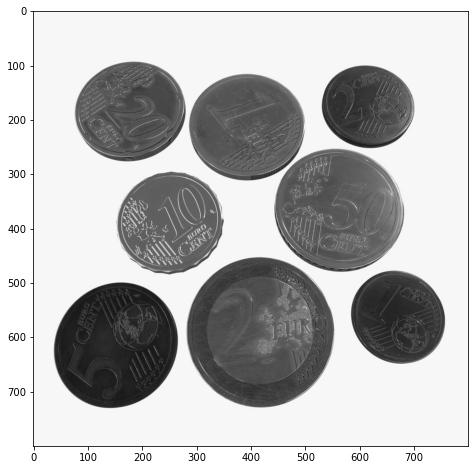

In [3]:
# Convert the image above to grayscale
gray_coins = cv2.cvtColor(color_coins, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (12,8))
plt.imshow(gray_coins, cmap="gray");

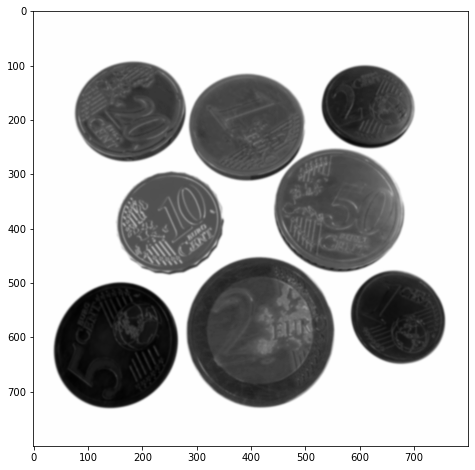

In [4]:
# Apply some gaussian blur to it (try differente size kernels)
gray_coins_copy = gray_coins.copy()
blur_coins = cv2.GaussianBlur(gray_coins_copy, (7,7), 0)
plt.figure(figsize = (12,8))
plt.imshow(blur_coins, cmap="gray");

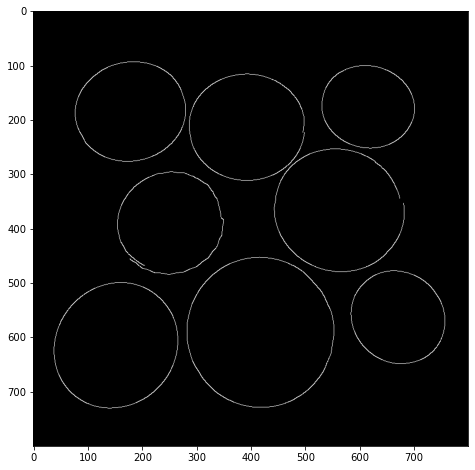

In [5]:
# Apply Canny to find edges and display the image 
canny_coins = cv2.Canny(blur_coins, 150, 300)
plt.figure(figsize = (12,8))
plt.imshow(canny_coins, cmap="gray");

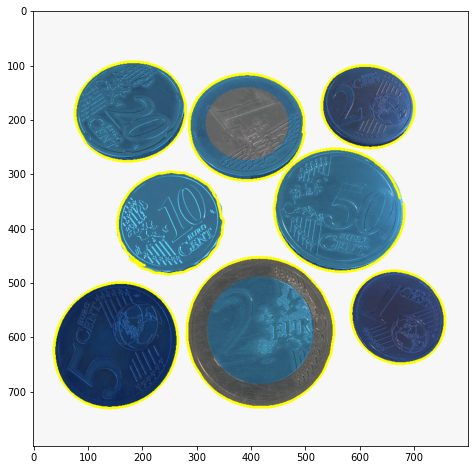

In [6]:
# Now find the contours on the image where you applied canny as well as in the grayscale image
# Draw the contours on the images (or better yet on copies of the images)
# Display the images, how does it look like?
canny_coins_contours, hierarchy = cv2.findContours(canny_coins, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
color_coins_copy = color_coins.copy() 
cv2.drawContours(color_coins_copy, canny_coins_contours, -1, (255,255,0), 4) 
plt.figure(figsize = (12,8))
plt.imshow(color_coins_copy);

[Hint](# "You will need to use cv2.findContours and cv2.drawContours") 

In [7]:
# print the number of contours that has been found
len(canny_coins_contours)

8

[Hint](# "Simply use the built it python len funtion -> len(coins_contours)") 

In [8]:
# Load your own images and try the same, Note:
# applying gaussian blur and canny is not necessary but can be useful to clean up the image and get rid of noise


## Sorting Contours

### By area

In [58]:
def get_contour_areas(contours):
    all_areas = []
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        all_areas.append(contour_area)
    return all_areas

In [59]:
# We can sort contours with any function, a really useful way of sorting is by area, in many situations we might
# only want to find the biggest or smallest contours, I'm providing the function I use to get all contour areas
# This function is useful to be able to see at a glance all contours areas and get a sense of what is the biggest 
# And which one is the smallest one, however we will not use this to sort them we can just pass cv2.contourArea 
# To the function that is going to be sorting it later
# Call get_contour_areas an pass in the list of contours you got with openCV and then store the results in a var
get_contour_areas(canny_coins_contours)

# Print the contour areas to screen
print ("Contour Areas", get_contour_areas(canny_coins_contours))

Contour Areas [41181.5, 23144.5, 58493.5, 174.5, 189.0, 162.0, 20341.5, 29253.0]


In [60]:
# Now sort the areas by biggest to smallest and print the sorted areas
color_coins_copy = color_coins.copy() 
sorted_contours = sorted(canny_coins_contours, key=cv2.contourArea, reverse=True) 
cv2.drawContours(color_coins_copy, sorted_contours, -1, (0, 255, 0), 3) 
print ("Biggest to smallest contour areas", get_contour_areas(sorted_contours))

Biggest to smallest contour areas [58493.5, 41181.5, 29253.0, 23144.5, 20341.5, 189.0, 174.5, 162.0]


[Hint](# "Use the built it python sorted funtion pass in the cv2.contourArea as the key for sorting") 

In [61]:
# Now sort the areas in the opposite way smallest to biggest and print the sorted areas
color_coins_copy = color_coins.copy() 
sorted_smallest_contours = sorted(canny_coins_contours, key=cv2.contourArea, reverse=False)
cv2.drawContours(color_coins_copy, sorted_smallest_contours, -1, (0, 255, 0), 3) 
print("Smallest to biggest contour areas", get_contour_areas(sorted_smallest_contours))

Smallest to biggest contour areas [162.0, 174.5, 189.0, 20341.5, 23144.5, 29253.0, 41181.5, 58493.5]


In [80]:
# Filter out only the 5 biggest contours and print them
color_coins_copy = color_coins.copy()
sorted_5_contours = sorted(canny_coins_contours, key=cv2.contourArea, reverse=True) 
c = sorted_5_contours[0:5]
cv2.drawContours(color_coins_copy, c, -1, (0, 255, 0), 3) 
print("Five biggest contour areas", get_contour_areas(c))

Five biggest contour areas [58493.5, 41181.5, 29253.0, 23144.5, 20341.5]


[Hint](# "Just slice the array!") 

In [82]:
# Now in a clean image draw the contours you just filtered out and display it

In [16]:
# Repeat the same with your own images, practice sorting contours and think of how it can be useful
# You might need to sort them by something else, just be creative!


### By X coordinate (left to right)

In [85]:
def get_contour_x_center_coordinate(contours):    
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return(int(M['m10']/M['m00']))

[OpenCV Moments](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/)

In [87]:
# This is an useful function you can use when you need to sort contours left to right
# Sort the contours this time left to right


In [19]:
# Draw the contours one at a time and display the images on screen 


[Hint](# "You can just extract the one contour at a time from the list and pass it in to drawContours as a new list that contains that only one contour, you can use a for loop to iterate the contours") 

In [20]:
# Can you think of other ways to sort contours?
